##### Yes (elegeibal customer) , No ( Not elegibal customer)

In [770]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [771]:
import pandas as pd
new = pd.read_csv(r"C:\Users\Pratiksha\OneDrive\Desktop\python code ML\ML\Loan_Data.csv")

#first few rows
new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [772]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [773]:
new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [774]:
## convert object into int
new['Dependents']=new['Dependents'].replace("3+" , np.nan).astype(float)
#new["Dependents"] = pd.to_numeric(new["Dependents"], errors='coerce').fillna(0, downcast='infer')


In [775]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         548 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [776]:
new.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           66
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [777]:
for column in ['Gender','Self_Employed','Married',"Dependents"]:
    new[column].fillna(new[column].mode()[0], inplace=True)

In [778]:
for column in ['LoanAmount','Credit_History','Loan_Amount_Term']:
 new[column].fillna(new[column].median(), inplace=True)
#new['LoanAmount'].fillna(new['LoanAmount'].median(),inplace=True)

In [779]:
new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [780]:
columns_name=new.select_dtypes(include=[np.number]).columns.tolist()
columns_name

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

<AxesSubplot:>

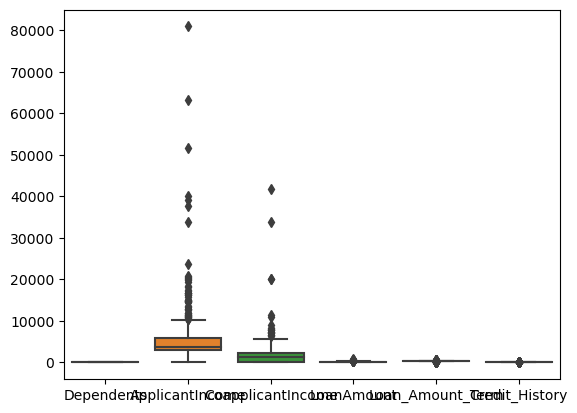

In [781]:
sns.boxplot(data=new)

In [782]:
for column in columns_name:
    Q1=new[column].quantile(0.25)
    Q3=new[column].quantile(0.75)
    IQR= Q3-Q1
    Lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    for value in new[column]:
        if value > upper_limit:
            new[column]=np.where(new[column] > upper_limit,upper_limit,new[column])
        else:
            new[column]=np.where(new[column]<Lower_limit,Lower_limit,new[column])

<AxesSubplot:>

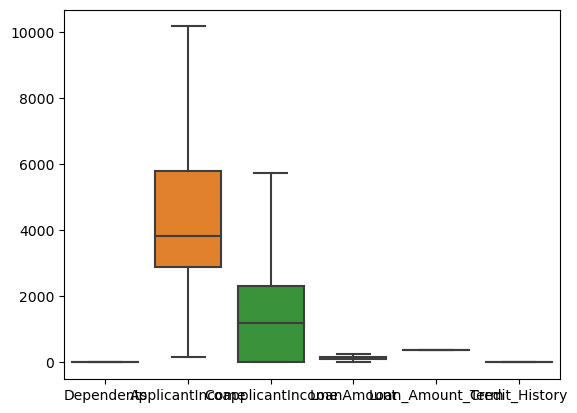

In [783]:
sns.boxplot(data=new)

## Data Visualization

### Bad Rate Analysis


In [784]:
new.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [785]:
(192/614)*100 # 31% Bad customera are not eligebal for loan....

31.27035830618892

In [786]:
import plotly.express as px

fig = px.pie(new,names='Loan_Status',color='Loan_Status',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

### Analysis 

* 31% are not eligible for Loan
* 68% are eligible for Loan

# Breaking Data into Two part

* Quantitative Variable( numeric data)
* Qualitative Variable (Catrgorical Data )
 

In [787]:
new=new.drop('Loan_ID',axis=1)

In [788]:
new.select_dtypes(include=[np.number]).columns.tolist()

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [789]:
Quantitative_Variable=new[new.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849.0,0.0,128.0,360.0,1.0
1,1.0,4583.0,1508.0,128.0,360.0,1.0
2,0.0,3000.0,0.0,66.0,360.0,1.0
3,0.0,2583.0,2358.0,120.0,360.0,1.0
4,0.0,6000.0,0.0,141.0,360.0,1.0


In [790]:
Qualitative_variable=new[new.select_dtypes(include=['object']).columns.tolist()]
Qualitative_variable.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y


In [791]:
from sklearn.preprocessing import LabelEncoder
Qualitative_variable =Qualitative_variable.apply(LabelEncoder().fit_transform)
Qualitative_variable.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1


In [792]:
Final=pd.concat([Quantitative_Variable,Qualitative_variable],axis=1)
Final.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,2,1
1,1.0,4583.0,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000.0,0.0,66.0,360.0,1.0,1,1,0,1,2,1
3,0.0,2583.0,2358.0,120.0,360.0,1.0,1,1,1,0,2,1
4,0.0,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,2,1


In [793]:
from sklearn.model_selection import train_test_split

x=Final.drop('Loan_Status',axis=1)
y=Final[['Loan_Status']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=266)

## Model building 


# Hypothesis

* H0 :- There is no log linear relationship between Loan_Status and all independent Variable

Vs 

* H1 :- There is log linear relationship between Loan_Status and all independent Variable

Alpha = 0.05 (5%)

In [794]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logres = LogisticRegression()
output=logres.fit(x_train,y_train)

In [795]:
output.intercept_

array([6.59522237e-06])

In [796]:
output.coef_

array([[-1.00397970e-01,  5.59092814e-05,  7.88105530e-05,
        -5.08094444e-03,  2.18631904e-03,  6.07310844e-06,
        -1.19885608e-01,  6.13201226e-01, -3.04859484e-01,
        -1.34293501e-01,  2.17991778e-01]])

In [797]:
output.feature_names_in_

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Education', 'Self_Employed', 'Property_Area'], dtype=object)

# Predictions on Train Dataset

In [798]:
train=pd.concat([x_train,y_train],axis=1)

train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
500,0.0,645.00,3683.0,113.0,360.0,1.0,0,0,0,0,0,1
17,0.0,3510.00,0.0,76.0,360.0,1.0,0,0,0,0,2,0
184,0.0,3625.00,0.0,108.0,360.0,1.0,0,1,0,0,1,1
310,0.0,2917.00,0.0,84.0,360.0,1.0,0,0,0,0,1,1
483,0.0,10171.25,0.0,234.0,360.0,1.0,1,1,0,0,1,1


In [799]:
train['predict']=output.predict(x_train)
train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,predict
500,0.0,645.00,3683.0,113.0,360.0,1.0,0,0,0,0,0,1,1
17,0.0,3510.00,0.0,76.0,360.0,1.0,0,0,0,0,2,0,1
184,0.0,3625.00,0.0,108.0,360.0,1.0,0,1,0,0,1,1,1
310,0.0,2917.00,0.0,84.0,360.0,1.0,0,0,0,0,1,1,1
483,0.0,10171.25,0.0,234.0,360.0,1.0,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2.0,10171.25,0.0,261.5,360.0,1.0,1,1,0,0,2,1,1
151,0.0,2577.00,3750.0,152.0,360.0,1.0,1,1,0,1,0,1,1
599,2.0,5780.00,0.0,192.0,360.0,1.0,1,1,0,0,2,1,1
215,0.0,3850.00,983.0,100.0,360.0,1.0,1,1,1,0,1,1,1


# Model Performance Metrics

In [800]:
from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(train['predict'],train['Loan_Status'])

matrix

array([[  3,   3],
       [127, 296]], dtype=int64)

In [808]:
Accuracy_train=((3+296)/(429)*100)
Accuracy_train

69.6969696969697

In [809]:
from sklearn.metrics import classification_report 
print(classification_report(train['Loan_Status'],train['predict']))

              precision    recall  f1-score   support

           0       0.50      0.02      0.04       130
           1       0.70      0.99      0.82       299

    accuracy                           0.70       429
   macro avg       0.60      0.51      0.43       429
weighted avg       0.64      0.70      0.58       429



* Accuracy of  Model is 70%,Hence Model is good Fit 
* Accuracy of Bad Customer Capture by Model is 99% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 0.04% (Specificity

# Predictions on Test Dataset

In [810]:
test=pd.concat([x_test,y_test],axis=1)
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
26,0.0,2799.0,2253.0,122.0,360.0,1.0,1,1,0,0,1,1
562,0.0,5923.0,2054.0,211.0,360.0,1.0,1,1,0,0,0,1
197,0.0,1907.0,2365.0,120.0,360.0,1.0,0,0,1,0,2,1
220,0.0,2221.0,0.0,60.0,360.0,1.0,1,1,0,0,2,0
423,1.0,7250.0,1667.0,110.0,360.0,1.0,1,1,0,0,2,0


In [811]:
test['predict']=output.predict(x_test)
test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,predict
26,0.0,2799.0,2253.0,122.0,360.0,1.0,1,1,0,0,1,1,1
562,0.0,5923.0,2054.0,211.0,360.0,1.0,1,1,0,0,0,1,1
197,0.0,1907.0,2365.0,120.0,360.0,1.0,0,0,1,0,2,1,1
220,0.0,2221.0,0.0,60.0,360.0,1.0,1,1,0,0,2,0,1
423,1.0,7250.0,1667.0,110.0,360.0,1.0,1,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0.0,2947.0,1664.0,70.0,360.0,1.0,1,1,1,0,2,0,1
431,0.0,6500.0,0.0,105.0,360.0,1.0,1,0,0,0,0,0,1
272,0.0,2833.0,1857.0,126.0,360.0,1.0,1,0,0,0,0,1,1
458,2.0,4354.0,0.0,136.0,360.0,1.0,1,0,0,0,0,1,1


In [812]:
from sklearn.metrics import confusion_matrix

metrix=confusion_matrix(test['predict'],test['Loan_Status'])

metrix

#from sklearn.metrics import confusion_matrix

array([[  0,   2],
       [ 62, 121]], dtype=int64)

In [813]:
Accuracy = ((0+121)/(185)*100)
Accuracy

65.4054054054054

 * Accuracy of Train data 70%
 * Accuract of test Data 65% so this model is not good fit model